# Robot failure

### Each robot records time series from six different sensors. For each sample denoted by a different id we are going to classify if the robot reports a failure or not. From a machine learning point of view, our goal is to classify each group of time series.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

/home/andres/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/andres/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### The first column is the DataFrame index and has no meaning here. There re six different time series (a-f) for the different sensors. The different robots are denoted by the ids column.

In [2]:
#Data from the sensors

timeseries.describe()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,44.500000,7.000000,-2.345455,8.913636,-128.214394,-39.028030,-4.517424,0.868182
std,25.411399,4.322131,50.367960,45.845475,346.816091,147.269399,101.609308,18.317250
min,1.000000,0.000000,-260.000000,-353.000000,-1547.000000,-672.000000,-646.000000,-137.000000
25%,22.750000,3.000000,-4.000000,-2.000000,-117.250000,-39.250000,-13.000000,-1.000000
50%,44.500000,7.000000,-1.000000,1.000000,46.000000,-9.000000,-3.000000,0.000000
75%,66.250000,11.000000,3.000000,11.000000,60.000000,-1.000000,3.000000,2.000000
max,88.000000,14.000000,342.000000,236.000000,157.000000,686.000000,601.000000,123.000000


### On the other hand, y contains the information which robot id reported a failure and which not:

In [3]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
id      1320 non-null int64
time    1320 non-null int64
F_x     1320 non-null int64
F_y     1320 non-null int64
F_z     1320 non-null int64
T_x     1320 non-null int64
T_y     1320 non-null int64
T_z     1320 non-null int64
dtypes: int64(8)
memory usage: 82.6 KB


In [4]:
# y  contains the information which robot id reported a failure and which not:

y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

### In the following we illustrate the time series of the sample id 3 reporting no failure:

In [5]:
selected_ID = 20

for tripID in set(timeseries['id'].values):
        df_ID = timeseries[timeseries['id'] == selected_ID]

In [6]:
# Get data for individual ID
# Selected_trip : Id of a particular trip


def select_ID(df,selected_ID):
    for tripID in set(timeseries['id'].values):
        df_ID = timeseries[timeseries['id'] == selected_ID]




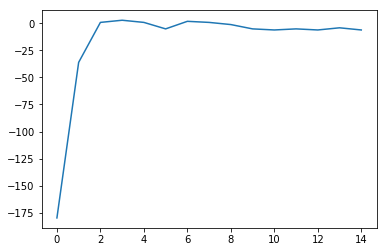

In [7]:
select_ID(timeseries,1)
plt.plot(df_ID['time'],df_ID['T_x'])
plt.show() 



#### For extracting all features, we do:


Details in : http://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html


In [8]:
extraction_settings = ComprehensiveFCParameters()

In [9]:
from tsfresh import extract_features

X = extract_features(timeseries, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute, n_jobs= 4)

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.77it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [10]:
X.head()

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""","F_x__agg_autocorrelation__f_agg_""median""","F_x__agg_autocorrelation__f_agg_""var""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-inf,T_z__value_count__value_0,T_z__value_count__value_1,T_z__value_count__value_inf,T_z__value_count__value_nan,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,2.602085e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,0.000000,-0.090909,0.000000,0.0,11.0,0.0,0.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,0.000000,-0.181818,0.000000,0.0,8.0,1.0,0.0,0.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,-0.076923,-0.090909,-0.222222,0.0,9.0,2.0,0.0,0.0,0.382222,0.0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4764 entries, F_x__abs_energy to T_z__variance_larger_than_standard_deviation
dtypes: float64(4764)
memory usage: 3.2 MB


### Further, you can even perform the extraction, imputing and filtering at the same time with the tsfresh.extract_relevant_features() function:

In [12]:
X_filtered = extract_relevant_features(timeseries, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [13]:
X_filtered.head()

variable,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__standard_deviation,T_y__variance,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,"F_z__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""",...,T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9,"F_z__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""intercept""","T_x__agg_autocorrelation__f_agg_""mean""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8",T_x__spkt_welch_density__coeff_5,"T_y__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""intercept""","F_y__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.2","F_z__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_z__change_quantiles__f_agg_""var""__isabs_False__qh_0.8__ql_0.4"
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,15.0,13.0,0.471405,0.222222,1.000000,1.165352,10.0,1.203698,0.65,...,0.0,0.0,62.833333,-0.095589,0.209184,0.037795,-1.000000,0.000000,63.0,0.000000
2,25.0,13.0,76.0,2.054805,4.222222,0.624118,6.020261,90.0,4.333846,19.84,...,1.0,0.0,64.666667,-0.054604,0.000000,0.319311,-1.000000,0.222222,70.0,2.666667
3,12.0,14.0,40.0,1.768867,3.128889,2.203858,8.235442,103.0,4.616877,22.01,...,1.0,0.0,67.333333,-0.061050,0.000000,9.102780,-3.000000,0.250000,68.0,8.187500
4,16.0,10.0,60.0,2.669998,7.128889,0.844394,12.067855,124.0,3.833188,10.64,...,0.0,0.0,63.666667,-0.133794,1.555556,56.910262,-3.166667,1.360000,66.0,1.000000
5,17.0,13.0,46.0,2.039608,4.160000,2.730599,6.445330,180.0,4.841487,16.00,...,0.0,0.6,64.333333,-0.106108,0.000000,22.841805,-4.166667,1.040000,67.0,0.000000


In [14]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 623 entries, F_x__abs_energy to F_z__change_quantiles__f_agg_"var"__isabs_False__qh_0.8__ql_0.4
dtypes: float64(623)
memory usage: 429.0 KB


# Train and evaluate a DecisionTreeClassifier

In [15]:
X_train, X_test, X_filtered_train, X_filtered_test,\
                            y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)

### First, test and train with the unfiltered data

In [16]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(X_train, y_train)

print(classification_report(y_test, DecisionTree.predict(X_test)))

             precision    recall  f1-score   support

      False       0.96      1.00      0.98        25
       True       1.00      0.91      0.95        11

avg / total       0.97      0.97      0.97        36



In [17]:
DecisionTree.n_features_

4764

### Now, train with the filtered data

In [18]:
DecisionTree2 = DecisionTreeClassifier()

DecisionTree2.fit(X_filtered_train, y_train)

print(classification_report(y_test, DecisionTree2.predict(X_filtered_test)))

             precision    recall  f1-score   support

      False       0.96      1.00      0.98        25
       True       1.00      0.91      0.95        11

avg / total       0.97      0.97      0.97        36



## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix


y_predicted = DecisionTree2.predict(X_filtered)



In [20]:
confusion_matrix(y, y_predicted)

array([[67,  0],
       [ 1, 20]])

In [21]:
pd.crosstab(y, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,67,0,67
True,1,20,21
All,68,20,88


###  The diagonal elements show the number of correct classifications for each class

### The off-diagonal elements provides the misclassifications

### The total number of classifications for each class in both y_true and y_pred, from the "All" subtotals


# Train and evaluate a RandomForestRegressor 

In [38]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard	deviation:",scores.std())

In [23]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()

forest_reg.fit(X_filtered_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
forest_scores = cross_val_score(forest_reg, X_filtered_train, y_train, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


Scores: [0.08164966 0.05773503 0.27202941 0.25690465 0.13416408 0.18439089
 0.06324555 0.04472136 0.04472136 0.06324555]
Mean: 0.12028075400623184
Standard	deviation: 0.08326187732505401


## Perform a from GridSearchCV


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3,	10], 'max_features': [2, 3, 4]},
 ]


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')



In [26]:
grid_search.fit(X_filtered_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [27]:
grid_search.best_params_


{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [28]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [29]:
cvres = grid_search.cv_results_


In [30]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),	params)


0.2401922307076307 {'max_features': 2, 'n_estimators': 3}
0.21661735138967272 {'max_features': 2, 'n_estimators': 10}
0.19480430680228286 {'max_features': 2, 'n_estimators': 30}
0.25318484177091666 {'max_features': 4, 'n_estimators': 3}
0.2089350285467857 {'max_features': 4, 'n_estimators': 10}
0.17920765780341144 {'max_features': 4, 'n_estimators': 30}
0.21182963643408087 {'max_features': 6, 'n_estimators': 3}
0.2265968972562375 {'max_features': 6, 'n_estimators': 10}
0.19817543811861318 {'max_features': 6, 'n_estimators': 30}
0.17902871850985824 {'max_features': 8, 'n_estimators': 3}
0.1726490437497188 {'max_features': 8, 'n_estimators': 10}
0.19381460874790263 {'max_features': 8, 'n_estimators': 30}
0.25318484177091666 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
0.18861845900368043 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
0.1729581738875903 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
0.16927446988204145 {'n_estimators': 10, 'max_featu

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_

feature_importances


array([0.        , 0.08874459, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01061224, 0.        , 0.00928571,
       0.        , 0.        , 0.03531263, 0.00588095, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03312437, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00619048, 0.        ,
       0.        , 0.        , 0.        , 0.12014286, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03581633, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
### Predict for the whole dataset and 

In [33]:
y_predicted_forest = DecisionTree2.predict(X_filtered_test)


pd.crosstab(y_test, y_predicted_forest, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,25,0,25
True,1,10,11
All,26,10,36


## Using Keras 


In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras import optimizers
from itertools import cycle
import itertools

Using TensorFlow backend.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [57]:
# pick a large window size of 50 cycles
sequence_length = 50

In [60]:
train_df = timeseries.loc[timeseries['id'] <= 88]
train_df.tail()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5
1319,88,14,-13,2,15,-25,-25,6


In [59]:
test_df = timeseries.loc[timeseries['id'] > 80]
test_df.tail()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5
1319,88,14,-13,2,15,-25,-25,6


In [61]:
train_df.columns

Index(['id', 'time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z'], dtype='object')

[Keras LSTM](https://keras.io/layers/recurrent/) layers expect an input in the shape of a numpy array of 3 dimensions (samples, time steps, features) where samples is the number of training sequences, time steps is the look back window or sequence length and features is the number of features of each sequence at each time step. 

In [62]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [63]:
# pick the feature columns 
sensor_cols = ['id', 'time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']


sequence_cols = sensor_cols

#sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
#sequence_cols.extend(sensor_cols)

In [67]:
train_df.shape

(1320, 8)

In [65]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in train_df['id'].unique())

In [66]:
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(0,)

In [123]:
seq_array[0,0]

IndexError: too many indices for array

In [ ]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [ ]:
# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['label1']) 
             for id in train_df['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

## LSTM Network

Next, we build a deep network. The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units. Dropout is also applied after each LSTM layer to control overfitting. Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.


In [ ]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
%%time
# fit the network
model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

In [ ]:
# make predictions and compute confusion matrix
y_pred = model.predict_classes(seq_array,verbose=1, batch_size=200)
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

In [ ]:
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

In [ ]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [ ]:
label_array_test_last = test_df.groupby('id')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

In [ ]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

In [ ]:
# test metrics
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))

In [ ]:
# make predictions and compute confusion matrix
y_pred_test = model.predict_classes(seq_array_test_last)
y_true_test = label_array_test_last
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm

In [ ]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

In [ ]:
results_df = pd.DataFrame([[scores_test[1],precision_test,recall_test,f1_test],
                          [0.94, 0.952381, 0.8, 0.869565]],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                         index = ['LSTM',
                                 'Template Best Model'])
results_df

In [2]:
def plot_confusion_matrix(test_y, pred_y, class_names, filename):
    """
    This function prints and plots the confusion matrix.
    """
    cmap = plt.cm.Blues
    # Compute confusion matrix
    cm = confusion_matrix(
        np.argmax(test_y, axis=1), np.argmax(pred_y, axis=1))
    np.set_printoptions(precision=2)
    # Plot confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("LSTM Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename + ".png")
    # Plot normalized confusion matrix


In [3]:
def plot_confusion_matrix(test_y, pred_y, class_names, filename):
    """
    This function prints and plots the confusion matrix.
    """
    cmap = plt.cm.Blues
    # Compute confusion matrix
    cm = confusion_matrix(
        np.argmax(test_y, axis=1), np.argmax(pred_y, axis=1))
    np.set_printoptions(precision=2)
    # Plot confusion matrix
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("LSTM Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename + ".png")
    # Plot normalized confusion matrix

In [4]:
def plotroc(test_y, pred_y, n_classes, filename):
    """
    Compute ROC curve and ROC area for each class
    """
    fpr = dict()
    tpr = dict()
    threshold = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], threshold[i] = roc_curve(test_y[:, i], pred_y[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Plot all ROC curves
    plt.figure()
    lw = 1
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'''.
                 format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LSTM Performance')
    plt.legend(loc="lower right")
    plt.savefig(filename + '.png')
    return